# Investigating Fandango Movie Ratings

## Introduction

Many times when we determine the right movie to watch for the night, we refer to movie rating sites such as Fandango or rotten tomatoes. Unfortunately, the data journalist Walt Hickey discovered that Fandango used a obsecure rounding on their rating in 2015, which made all the movie rate higher than they would be. Fandango claimed that the mistake was due to a bug in the software, and has fixed the issue. In this project, we aim to analyze more recent rating datas and see if there are any changes in the rating system. 

In [1]:
import pandas as pd

fandango_2015 = pd.read_csv('fandango_score_comparison.csv')

print(fandango_2015.shape)
fandango_2015.head()

(146, 22)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


Hickey's dataset has 22 columns and 146 rows. The columns includes information on the movie, ratings and number of votes from other movie rating sites, as well as the rating on Fandango. 

In [2]:
fandango_2016 = pd.read_csv('movie_ratings_16_17.csv')
print(fandango_2016.shape)
fandango_2016.head()

(214, 15)


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


The 2016-2017 dataset contains 214 rows and 15 columns. It has some similar information to the 2015 dataset, except that there are some colums that were not used.

In [3]:
# Isolate Fandango Data

fandango_2015 = fandango_2015[['FILM', 'Fandango_Stars',
                               'Fandango_Ratingvalue',
                               'Fandango_votes','Fandango_Difference']]
fandango_2016 = fandango_2016[['movie', 'year', 'fandango']]

In [4]:
fandango_2015.head(1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5


In [5]:
fandango_2016.head(1)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5


Since we are trying to see if there are any changes in the rating system after Hickey's analysis, the **population** we are interested in is made of all the movie ratings on the website.

Because we are trying to compare the ratings before and after Hickey's analysis, our two **samples** which are taken in the years before and after his analysis made sense. 

To analyze if the samples are appropriate for the population we are trying to describe, we would have to extract information on the source page. 


[Hickey's sample README.md](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md):

**sampling criteria**: movie had 30 or more user reviews. The movie must have had tickets on sale in 2015.

The sampling neglects any movies that have 30 user reviews, so there are movies that never had a chance to be included in the analysis. The data set is not likely to be repesentitive of our population since the sample is subject to temporal trands. 


[2016-2017 sample README.md](https://github.com/mircealex/Movie_ratings_2016_17)

**sampling criteria**: contains rating data for 214 of the most popular movies with siginificant number of votes released in 2016 and 2017. 

The dataset only selected the top 214 movies of the year. Since the data set is not sampled randomly, this data set also isn't repesentitive to our population.

## Make Adjustments to Project Goal

It is much more efficient to alter our population and keep the initial goal than search for new data sets. 

Instead of analyzing the rating difference between **all** movies before and after Hickey's analysis, we are going to adjust our goal to analyze the rating difference in popular movies of the year. This new goal should achieve a similar result compared to our original goal.

We are going to define popular movie as movies that has more 30 or more fan ratings. And we are going to define the two time stamps as movies released in 2015 and in 2016.

## Isolating Sample of Interest

Now that we defined out benchmark for popular movies, we would have to check each data set to see if most sample points falls under our defined category of popular movie.

---

In [6]:
sum(fandango_2015['Fandango_votes'] < 30)

0

In the 2015 data set, there are no movies that has less than 30 fan ratings. This is expected since Hickey based his sampling off the criteria of selecting movies with only 30 or more fan reviews. 

---

For the 2016-2017 sample, there is not column where we could directly see the amount of reviews for it. Therefore, we are going to sample 10 random movies from the data set and check it on Fandango's website by ourselves. If more than 80% of the movies are considered "popular", we could proceed with our analysis.

In [7]:
fandango_2016.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Here are the results that we gathered from the Fandango website:

| movie | ratings |
| ------| ------ |
| Mechanic: Resurrection | 2247 |
| Warcraft | 7271 |
| Max Steel | 493 |
| Me Before You | 5263 |
| Fantastic Beasts and Where to Find Them | 13400 |
| Cell | 17 |
| Genius | 127 |
| Sully | 11877 |
| A Hologram from the King | 500 |
| Captain America: Civil War | 35057 |

From the data we could see that only the movie Cell has less than 30 fan ratings, which means more than 90% of the sample is considered popular movie. 


---

To further explore our sample, we need to double check if all the movies listed in the data set are released in the appropriate time.

The movies from Hickey's data set should be released in 2015 for our purposes. There is no column for year, but we could extract the information from the FILM column.

In [8]:
fandango_2015['year'] = fandango_2015['FILM'].str[-5:-1]
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [9]:
# isolate the movies in the year 2015
fandango_2015 = fandango_2015[fandango_2015['year'] == '2015']
fandango_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

Now we do the same procedure with the 2016-2017 dataset to extract all the movies released in the year 2016.



In [10]:
fandango_2016['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [11]:
fandango_2016 = fandango_2016[fandango_2016['year'] == 2016]
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Distribution Shape 2015 vs 2016

After gathering and cleaning our data, we are ready to do our initial analysis. First, we will generate plots to compare the distribution of movie raings of each sample. 

(0, 5)

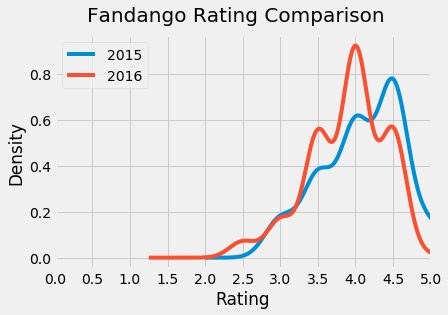

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend=True)
fandango_2016['fandango'].plot.kde(label='2016', legend=True)
plt.suptitle('Fandango Rating Comparison', fontsize=20)
plt.xlabel('Rating')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlim(0,5)

Both plots are left skewed, meaning that most ratings are on the higher end. Compared to the 2015 density plot, the 2016 plot is more uniformly distributed, which indicates a overall descrease in rating. There are also movies that has a lower rating than 3 stars in the 2016 data, which indicates that there is a adjustment to the rating system from Fandango.

## Frequecy Comparison

The distribution comparison gave us a clear direction: the ratings of popular movie in 2016 is lower than the ones in 2015. Now we are going to retrieve more information through a more gradular analysis.

In [36]:
fandango_2015['Fandango_Stars'].value_counts().sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [37]:
fandango_2016['fandango'].value_counts().sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

Both samples have different number of movies, so it doesn't make sense to compare the two tables using absolute frequency. We can however, use relative frequency where we analyze percentage of users in each rating category. 

In [43]:
print('2015' + '\n' + '-'*16)
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [44]:
print('2016' + '\n' + '-'*16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index()*100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In the 2015 rating, more than 70 percent of the ratings are higher than 4 stars, while in 2016, that value decreased to around 60 percent. There is also a higher percentage of ratings that are lower than 3. It is clear that the overall ratings of popular movies in 2016 is lower than the ones in 2015. However, there are a higher percentage of movies in the 3.5-4.0 star range in 2016, which makes the direction less clear than shown on the density plot.

## Summary Statistics

We are going to analyze the summary statistics of the data to see if we could extract any more useful information.

In [55]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]

mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


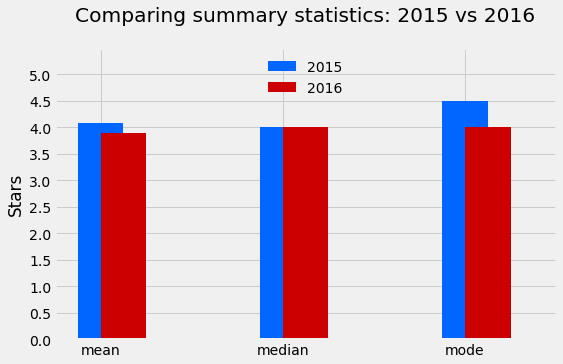

In [61]:
from numpy import arange

summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean and mode both decreased in 2016. However, the median of the data remained the same. This means that there is a decrease in ratings overall but the magnitude of the decrease isn't large. This could suggest that the decrease might be coincidental or that Fandango applied a rating system that seems to decrease the rating value. 

## Conclusion

According to our analysis, there is indeed a slight difference in rating change between 2015 and 2016 where the mode and mean is lower in 2016. We can't be completely sure about the cause in the change but it is likely that Fandango fixed the biased system. 